In [1]:
import pandas as pd


In [2]:
raw_df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
raw_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
raw_df.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [5]:
raw_df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [6]:
# dropping the columns of EmployeeCount, EmployeeNumber, over18 since employee number, employee count, over 18 will not have much effect on the efficiency of the model

raw_df.drop(['EmployeeCount','EmployeeNumber','Over18'], axis = 1, inplace = True)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [8]:
# checking for null values
raw_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
raw_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [10]:
raw_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
# separating the features and the targets 

targets = raw_df['Attrition']
features = raw_df.drop('Attrition', axis = 1)

In [12]:
# calling get dummies to tranform the cat features 

df_transformed = pd.get_dummies(features, drop_first = True)

In [13]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [14]:
# will pre process the continous features to a range of 0 to 1 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_transformed)

In [15]:
df_scaled[:].shape

(1470, 45)

In [16]:
x = df_scaled[:]     #x is considered as my features
y = targets[:]       # y is considered as my targets

In [17]:
type(x)

numpy.ndarray

In [18]:
# we will implement knn classifier with cross validation.
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import cross_validate as RCV



In [19]:
model = KNeighborsClassifier()
cross_val_score = RCV(model,x,y, cv = 5, return_train_score = True)
print(cross_val_score.keys())

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


In [20]:
print('validation score', cross_val_score['test_score'])
print('validation mean', cross_val_score['test_score'].mean())
print('Train score', cross_val_score['train_score'])
print('Train score', cross_val_score['train_score'].mean())

validation score [0.84013605 0.84693878 0.83673469 0.86054422 0.83673469]
validation mean 0.8442176870748298
Train score [0.87159864 0.87159864 0.87585034 0.86819728 0.86819728]
Train score 0.8710884353741497


In [21]:
# now trying to find out the optimal value of k 
temp_dict = {}
for i in range(1,13):
    model = KNeighborsClassifier(n_neighbors = i)
    cross_val_score = RCV(model,x,y, cv = 5, return_train_score = True)
    temp_dict[i] = cross_val_score['test_score'].mean()
    print('k:',i,'   ','validation score mean', cross_val_score['test_score'].mean())

k: 1     validation score mean 0.7891156462585034
k: 2     validation score mean 0.8367346938775511
k: 3     validation score mean 0.8319727891156463
k: 4     validation score mean 0.8462585034013606
k: 5     validation score mean 0.8442176870748298
k: 6     validation score mean 0.8476190476190475
k: 7     validation score mean 0.848299319727891
k: 8     validation score mean 0.8489795918367348
k: 9     validation score mean 0.845578231292517
k: 10     validation score mean 0.8482993197278912
k: 11     validation score mean 0.8482993197278912
k: 12     validation score mean 0.8476190476190476


In [22]:
max(temp_dict.values())

0.8489795918367348

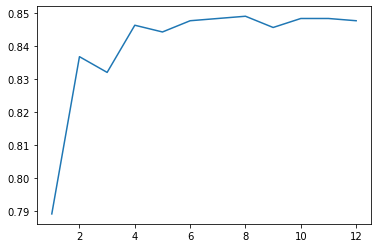

In [23]:
import matplotlib.pyplot as plt
plt.plot(temp_dict.keys(), temp_dict.values())
plt.show()

In [24]:
type(x)

numpy.ndarray

In [25]:
# now using train test split 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1234)

In [26]:
temp_dict2 = {}
for i in range(1,13):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)    
    temp_dict2[i] = accuracy_score(y_test,y_pred)

In [27]:
temp_dict2

{1: 0.8027210884353742,
 2: 0.8458049886621315,
 3: 0.8253968253968254,
 4: 0.8390022675736961,
 5: 0.8412698412698413,
 6: 0.8480725623582767,
 7: 0.8458049886621315,
 8: 0.8480725623582767,
 9: 0.8503401360544217,
 10: 0.8503401360544217,
 11: 0.8503401360544217,
 12: 0.8503401360544217}

In [28]:
max(temp_dict2.values())   # as we can see here when we are using train test split the accuracy is increasing may be due to small dataset will review later 

0.8503401360544217

In [29]:
# now implementing the decision tree to the same test. 

from sklearn.tree import DecisionTreeClassifier

In [30]:
temp = 0 
i = 1
while True:
    tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = i, random_state = 42)
    tree.fit(x_train,y_train)
    y_predict = tree.predict(x_test)
    if accuracy_score(y_test,y_predict) > temp:
        temp = accuracy_score(y_test,y_predict)
        optimal_depth = i
        accuracy = temp
        i = i + 1
    else:
        break



In [31]:
print(optimal_depth,accuracy)

2 0.8435374149659864


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test,y_predict))

[[355  16]
 [ 53  17]]


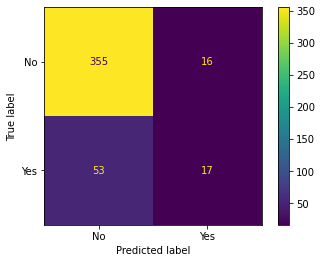

In [33]:
# import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_predict)
ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = tree.classes_).plot()


In [34]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [35]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8435


In [36]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1565


In [37]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.5152


In [38]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.2429


In [39]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0431


In [40]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9569


In [41]:
false_negative_rate = FN / float(FN + TP)


print('False Negative Rate : {0:0.4f}'.format(false_negative_rate))

False Negative Rate : 0.7571


In [42]:
# now will try to use Adaboost classifier to see if the the recall increases or not 
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=500,
                         learning_rate=0.5)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8616780045351474


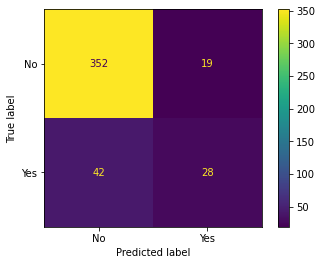

In [43]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = tree.classes_).plot()

In [44]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [45]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8617


In [46]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.5957


In [47]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.4000


In [48]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0512


In [49]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9488
